In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.metrics import r2_score
import sys
%matplotlib inline

Text(0.5, 0, 'chlorides')

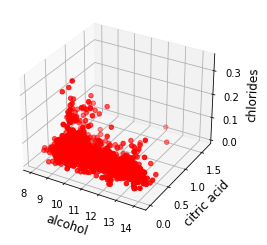

In [2]:
df = pd.read_csv('vino_blanco.csv')
X = df[['alcohol', 'citric acid']]
X = X.to_numpy()
y = df['chlorides']
y = y.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('alcohol',fontsize=12)
ax.set_ylabel('citric acid',fontsize=12)
ax.set_zlabel('chlorides',fontsize=12)

In [3]:
x_b = np.c_[np.ones((len(X),1)),X]
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std
    
N=len(y)
theta = np.array([[-10],[-10],[-10]])
ep=1e-4
lr =1e-7
n_iter = 30000
j_cost= np.zeros([n_iter])
y=y.reshape((len(y), 1))

for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    h=(pred - y)
    si=-lr*(x_bs.T.dot(h))
    theta = theta + si;
    j_cost[it]=np.sum(np.square(h))

r2_score(y, pred)
# fig = plt.figure()
# plt.plot(j_cost)
# plt.show()
# print(np.c_[pred,y,h])
# print("Iterations: %d" %it)
# print("DG:  \n theta_0=%f \n theta_1=%f, \n theta_2=%f" %(theta[0],theta[1],theta[2]))   

0.13736328983027812

Text(0.5, 0, 'chlorides')

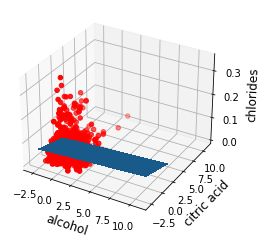

In [4]:
# %matplotlib qt
xc = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.01)
yc = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc)])
B, M = np.meshgrid(yc, xc)

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j]],theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('alcohol',fontsize=12)
ax.set_ylabel('citric acid',fontsize=12)
ax.set_zlabel('chlorides',fontsize=12)

[[0.05728474 0.045     ]
 [0.05245701 0.049     ]
 [0.04977881 0.05      ]
 ...
 [0.050254   0.041     ]
 [0.03072498 0.022     ]
 [0.03859499 0.02      ]]
0.1370010839227942


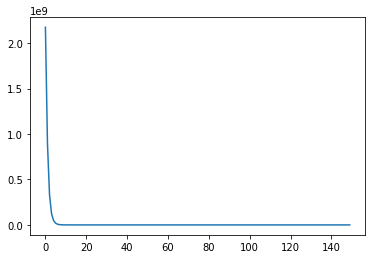

In [5]:
### Stochastic Gradient Descent
m = len(y)
lr =0.5
n_iter = 150
# theta = np.random.randn(3,1)
theta = np.array([[-10],[-10],[-10]])
j_cost= np.zeros([n_iter])
for it in range(n_iter):
    cost =0.0
    for i in range(m):
        rand_ind = np.random.randint(0,m)
        X_i = x_bs[rand_ind,:].reshape(1,x_bs.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        pred = np.dot(X_i,theta)
        h=pred - y_i
        theta = theta -(1/m)*lr*( X_i.T.dot((h)))
        cost +=(1/2*m)*np.sum(np.square(h))
    j_cost[it]=cost
pred = np.dot(x_bs,theta)
print(np.c_[pred,y])  
print(r2_score(y, pred))
fig = plt.figure()
plt.plot(j_cost)
plt.show()

Text(0.5, 0, 'chlorides')

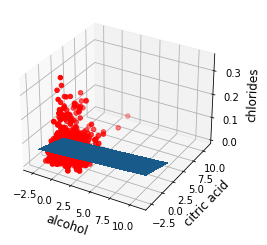

In [7]:
%matplotlib inline
for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j]],theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('alcohol',fontsize=12)
ax.set_ylabel('citric acid',fontsize=12)
ax.set_zlabel('chlorides',fontsize=12)